In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#conda install pandas=0.20.3


In [39]:
df_p = pd.read_csv('files/patients.csv')
df = pd.read_csv('merge_diag.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53104 entries, 0 to 53103
Data columns (total 31 columns):
SUBJECT_ID            53104 non-null int64
HADM_ID               53104 non-null int64
ADMITTIME             53104 non-null object
DEATHTIME             0 non-null float64
ADMISSION_TYPE        53104 non-null object
ADMISSION_LOCATION    53104 non-null object
DISCHARGE_LOCATION    53104 non-null object
INSURANCE             53104 non-null object
LANGUAGE              30592 non-null object
RELIGION              52743 non-null object
MARITAL_STATUS        53104 non-null object
ETHNICITY             53104 non-null object
DIAGNOSIS             53080 non-null object
LOS                   53104 non-null float64
d_blood               53104 non-null int64
d_circulatory         53104 non-null int64
d_congenital          53104 non-null int64
d_digestive           53104 non-null int64
d_endocrine           53104 non-null int64
d_genitourinary       53104 non-null int64
d_ill-defined        

In [40]:
df_p = df_p[['SUBJECT_ID', 'DOB', 'GENDER']]
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 3 columns):
SUBJECT_ID    46520 non-null int64
DOB           46520 non-null object
GENDER        46520 non-null object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [41]:
df = df.merge(df_p, how='inner', on='SUBJECT_ID')
df

,SUBJECT_ID,HADM_ID,ADMITTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,...,d_mental,d_muscular,d_neoplasms,d_nervous,d_pregnancy,d_prenatal,d_respiratory,d_skin,DOB,GENDER
0,22,165315,2196-04-09 12:26:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,...,1,0,0,1,0,0,0,0,2131-05-07 00:00:00,F
1,23,152223,2153-09-03 07:15:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,Religious,...,0,0,0,1,0,0,0,0,2082-07-17 00:00:00,M
2,23,124321,2157-10-18 19:34:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,Religious,...,0,0,1,1,0,1,0,0,2082-07-17 00:00:00,M
3,24,161859,2139-06-06 16:14:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,Religious,...,0,0,0,0,0,0,0,0,2100-05-31 00:00:00,M
4,25,129635,2160-11-02 02:06:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,...,0,0,0,0,0,0,0,0,2101-11-21 00:00:00,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53099,98769,141860,2125-02-22 22:18:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,ENGL,Religious,...,0,1,0,1,0,1,2,0,2044-10-22 00:00:00,F
53100,98790,187987,2200-10-15 01:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,...,0,1,0,0,0,0,0,1,2147-03-18 00:00:00,M
53101,98794,190603,2127-11-07 11:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,Religious,...,0,0,0,1,0,0,0,0,2049-07-29 00:00:00,M
53102,98800,191113,2131-03-30 21:13:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,...,0,0,0,0,0,0,0,0,2111-11-05 00:00:00,F


In [42]:
df_age_min = df[['SUBJECT_ID', 'ADMITTIME']].groupby('SUBJECT_ID').min().reset_index()
df_age_min.columns = ['SUBJECT_ID', 'MIN_ADMIT']
df = df.merge(df_age_min, how='outer', on='SUBJECT_ID')
df['MIN_ADMIT'] = pd.to_datetime(df['MIN_ADMIT']).dt.date
df['MIN_ADMIT'] = pd.to_datetime(df['MIN_ADMIT'])
df['DOB'] = pd.to_datetime(df['DOB'])
print(df.dtypes)


SUBJECT_ID                     int64
HADM_ID                        int64
ADMITTIME                     object
DEATHTIME                    float64
ADMISSION_TYPE                object
ADMISSION_LOCATION            object
DISCHARGE_LOCATION            object
INSURANCE                     object
LANGUAGE                      object
RELIGION                      object
MARITAL_STATUS                object
ETHNICITY                     object
DIAGNOSIS                     object
LOS                          float64
d_blood                        int64
d_circulatory                  int64
d_congenital                   int64
d_digestive                    int64
d_endocrine                    int64
d_genitourinary                int64
d_ill-defined                  int64
d_infectious                   int64
d_injury                       int64
d_mental                       int64
d_muscular                     int64
d_neoplasms                    int64
d_nervous                      int64
d

In [43]:
#df['age'] = (df['MIN_ADMIT'] - df['DOB'])#.dt.days) //365
#df['age']= np.subtract(df['MIN_ADMIT'], df['DOB'])
df['age'] = df.apply(lambda e: (e['MIN_ADMIT'] - e['DOB']).days//365, axis=1)
df['age'] = np.where(df['age'] >89, 90, df['age'])
df

,SUBJECT_ID,HADM_ID,ADMITTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,...,d_neoplasms,d_nervous,d_pregnancy,d_prenatal,d_respiratory,d_skin,DOB,GENDER,MIN_ADMIT,age
0,22,165315,2196-04-09 12:26:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,...,0,1,0,0,0,0,2131-05-07,F,2196-04-09,64
1,23,152223,2153-09-03 07:15:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,Religious,...,0,1,0,0,0,0,2082-07-17,M,2153-09-03,71
2,23,124321,2157-10-18 19:34:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,Religious,...,1,1,0,1,0,0,2082-07-17,M,2153-09-03,71
3,24,161859,2139-06-06 16:14:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,Religious,...,0,0,0,0,0,0,2100-05-31,M,2139-06-06,39
4,25,129635,2160-11-02 02:06:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,...,0,0,0,0,0,0,2101-11-21,M,2160-11-02,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53099,98769,141860,2125-02-22 22:18:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,ENGL,Religious,...,0,1,0,1,2,0,2044-10-22,F,2125-02-22,80
53100,98790,187987,2200-10-15 01:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,...,0,0,0,0,0,1,2147-03-18,M,2200-10-15,53
53101,98794,190603,2127-11-07 11:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,Religious,...,0,1,0,0,0,0,2049-07-29,M,2127-11-07,78
53102,98800,191113,2131-03-30 21:13:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,...,0,0,0,0,0,0,2111-11-05,F,2131-03-30,19


In [44]:
#df[df['age']>=15].count

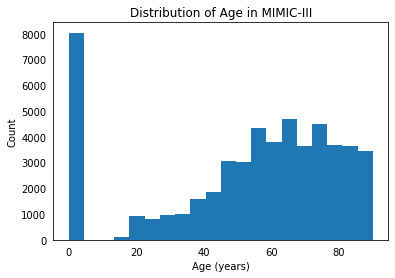

In [45]:
plt.hist(df['age'], bins=20)
plt.ylabel('Count')
plt.xlabel('Age (years)')
plt.title('Distribution of Age in MIMIC-III')
plt.tick_params(left=False, bottom=False, top=False, right=False) 
plt.show();

(1, 50)

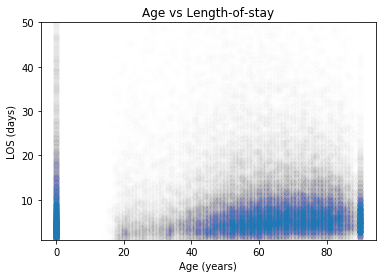

In [46]:
plt.scatter(df['age'], df['LOS'], alpha=0.005)
#plt.yscale('sqrt')
plt.ylabel('LOS (days)')
plt.xlabel('Age (years)')
plt.title('Age vs Length-of-stay')
plt.ylim(1, 50)

In [47]:
age_ranges = [(0, 1), (13, 36), (36, 56), (56, 100)]
age_list = ['Infants','young adult','middle_adult','senior']
for num, cat_range in enumerate(age_ranges):
    df['age'] = np.where(df['age'].between(cat_range[0],cat_range[1]), num, df['age'])
    
for i in range (len(df['age'])):
    df['age'][i] = age_list[df['age'][i]]
    


C:\Users\gavry\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [48]:
df['GENDER'].replace({'M': 0, 'F':1}, inplace=True)
df.info()
df.to_csv('merge_diag_pat.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53104 entries, 0 to 53103
Data columns (total 35 columns):
SUBJECT_ID            53104 non-null int64
HADM_ID               53104 non-null int64
ADMITTIME             53104 non-null object
DEATHTIME             0 non-null float64
ADMISSION_TYPE        53104 non-null object
ADMISSION_LOCATION    53104 non-null object
DISCHARGE_LOCATION    53104 non-null object
INSURANCE             53104 non-null object
LANGUAGE              30592 non-null object
RELIGION              52743 non-null object
MARITAL_STATUS        53104 non-null object
ETHNICITY             53104 non-null object
DIAGNOSIS             53080 non-null object
LOS                   53104 non-null float64
d_blood               53104 non-null int64
d_circulatory         53104 non-null int64
d_congenital          53104 non-null int64
d_digestive           53104 non-null int64
d_endocrine           53104 non-null int64
d_genitourinary       53104 non-null int64
d_ill-defined        

In [49]:
df[df['age']=='senior'].mean()

SUBJECT_ID          37670.772297
HADM_ID            150075.263262
DEATHTIME                    NaN
LOS                     9.890222
d_blood                 0.446593
d_circulatory           3.362494
d_congenital            0.027942
d_digestive             0.722596
d_endocrine             1.517062
d_genitourinary         0.711221
d_ill-defined           0.440102
d_infectious            0.336396
d_injury                2.272553
d_mental                0.369428
d_muscular              0.288301
d_neoplasms             0.279009
d_nervous               0.422511
d_pregnancy             0.000171
d_prenatal              0.101008
d_respiratory           0.867361
d_skin                  0.184424
GENDER                  0.449804
dtype: float64